In [1]:
import GCMPy as gp
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns
sns.set(style='ticks', context='paper')
colors=["#e3c934","#68c4bf","#c51000","#287271"]
sns.set_palette(colors)

## Import Peterson & Barney 1952 as pb52, convert to Bark

In [2]:
pb52=pd.read_csv('pb52.csv')
pbbark = gp.HzToBark(pb52,["F0","F1","F2","F3"])
pbbark.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
83,m,m,5,KIT,2,134,430,1880,2450,1.185635,4.293556,12.595729,14.364444
712,w,f,36,THOUGHT,1,203,610,900,2710,1.986149,5.833463,7.906713,15.027837
828,w,f,42,STRUT,1,250,750,1500,2750,2.502805,6.889742,11.092832,15.123397
39,m,m,2,NURSE,2,145,510,1130,1510,1.316770,5.005668,9.274304,11.136599
922,w,f,47,KIT,1,297,480,2670,3260,2.997944,4.744098,14.930626,16.213410


## Set some parameters

In [3]:
# set c, the sensitivity of exemplar cloud
cval=5

# set dimesnsions m as keys, 
    ## set weight of each dimension w_m as values
dimsvals={'z0':1,'z1':2.953,'z2':.924,'z3':3.420}

# set categories to be considered as items in a list
catslist=['vowel','type']

# Get a balanced test set, 50 obs per vowel
test = gp.gettestset(pbbark,'vowel',50)

## Categorize test set

In [4]:
choices = gp.multicat(test,pbbark,catslist,dimsvals,cval,exclude_self=True,alsoexclude=None, N=1, runnerup=False)

## Check accuracy

In [5]:
acc = gp.checkaccuracy(choices,catslist)

### vowel

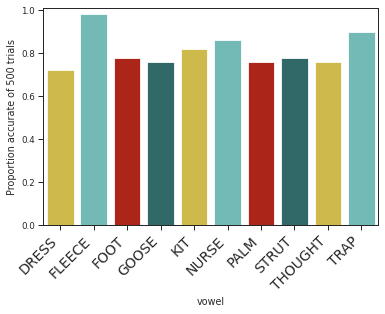

<AxesSubplot:xlabel='vowel', ylabel='Proportion accurate of 500 trials'>

In [6]:
gp.accplot(acc,'vowel')

In [7]:
print("overall accuracy: " + str(gp.overallacc(acc,'vowel')))

overall accuracy: 0.812


In [8]:
gp.propcorr(acc,'vowel')

,vowel,propcorr
0,DRESS,0.72
1,FLEECE,0.98
2,FOOT,0.78
3,GOOSE,0.76
4,KIT,0.82
5,NURSE,0.86
6,PALM,0.76
7,STRUT,0.78
8,THOUGHT,0.76
9,TRAP,0.90


### Speaker type

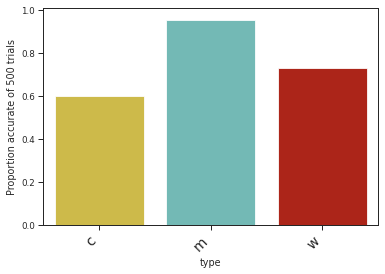

<AxesSubplot:xlabel='type', ylabel='Proportion accurate of 500 trials'>

In [9]:
gp.accplot(acc,'type')

In [10]:
print("overall accuracy: " + str(gp.overallacc(acc,'vowel')))

overall accuracy: 0.812


In [11]:
gp.propcorr(acc,'type')

,type,propcorr
0,c,0.600000
1,m,0.951754
2,w,0.730539


### Generate confusion matrices

In [12]:
gp.confusion(choices,catslist)

{'vowel': vowelChoice  DRESS  FLEECE  FOOT  GOOSE   KIT  NURSE  PALM  STRUT  THOUGHT  \
 DRESS         0.72    0.00  0.00   0.00  0.24   0.02  0.00   0.00     0.00   
 FLEECE        0.00    0.98  0.00   0.00  0.02   0.00  0.00   0.00     0.00   
 FOOT          0.00    0.00  0.78   0.12  0.00   0.02  0.00   0.04     0.04   
 GOOSE         0.00    0.00  0.22   0.76  0.02   0.00  0.00   0.00     0.00   
 KIT           0.10    0.08  0.00   0.00  0.82   0.00  0.00   0.00     0.00   
 NURSE         0.08    0.00  0.00   0.00  0.02   0.86  0.00   0.00     0.00   
 PALM          0.00    0.00  0.00   0.00  0.00   0.00  0.76   0.20     0.02   
 STRUT         0.00    0.00  0.00   0.00  0.00   0.02  0.14   0.78     0.04   
 THOUGHT       0.00    0.00  0.06   0.04  0.00   0.02  0.12   0.00     0.76   
 TRAP          0.08    0.00  0.00   0.00  0.00   0.02  0.00   0.00     0.00   
 
 vowelChoice  TRAP  
 DRESS        0.02  
 FLEECE       0.00  
 FOOT         0.00  
 GOOSE        0.00  
 KIT          0

## Let's break down what happens in multicat

1. Exclude any exemplars you don't want to compate the stimulus/test to
2. Add activation (N=1) to each exemplar
3. Calculate activation
4. Calculate the probability of the stimulus being categorized as each label within the category 
5. Choose the label with the highest category
6. Check accuracy of choices

In [44]:
# Choose test stimulus
test = pbbark.sample() 

# 1) Exclude that exemplar from the exemplar cloud
exemplars=gp.exclude(pbbark,test,exclude_self=True)

# 2) Add base activation
exemplars = gp.reset_N(exemplars)

In [45]:
# view the test stimulus, 3 random exemplars
# and verify that the test stimulus has been removed from the cloud
print('Test:')
print(test)
print()
print()

print('3 exemplars:')
print(exemplars.sample(3))
print()
print()

print('Is test contained within exemplars?')
print(test.isin(exemplars))

Test:
    type gender  speaker vowel  repetition   F0   F1    F2    F3        z0  \
470    m      m       24  PALM           1  140  760  1260  2120  1.257333   

           z1       z2         z3  
470  6.961029  9.96087  13.400686  


3 exemplars:
     type gender  speaker  vowel  repetition     F0     F1      F2      F3  \
1191    w      f     60.0   PALM         2.0  210.0  920.0  1470.0  2690.0   
1404    c      m     71.0  DRESS         1.0  215.0  580.0  2650.0  3550.0   
844     w      f     43.0  DRESS         1.0  238.0  760.0  2380.0  3205.0   

            z0        z1         z2         z3  N  
1191  2.064516  8.034306  10.960000  14.979441  1  
1404  2.120184  5.591969  14.881388  16.743230  1  
844   2.372994  6.961029  14.172258  16.106215  1  


Is test contained within exemplars?
      type  gender  speaker  vowel  repetition     F0     F1     F2     F3  \
470  False   False    False  False       False  False  False  False  False   

        z0     z1     z2     z3  


<AxesSubplot:xlabel='z2', ylabel='z1'>

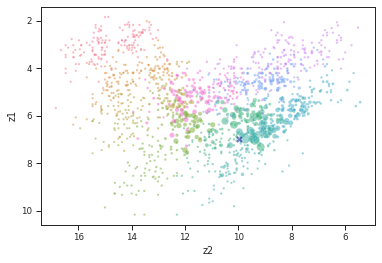

In [46]:
# 3) Calculate activation
activation = gp.activation(test,exemplars,dimsvals,cval)

# View activation of exemplars
actv = gp.getactiv(activation,'z2','z1','vowel')
gp.activplot(actv,'z2','z1','vowel',test)

In [47]:
# 4) calculate probabilities of labels

pr = gp.probs(activation,catslist)
pr

{'vowel':      vowel  probability
 0    DRESS     0.045703
 1   FLEECE     0.000768
 2     FOOT     0.072997
 3    GOOSE     0.023882
 4      KIT     0.011166
 5    NURSE     0.127788
 6     PALM     0.244715
 7    STRUT     0.223218
 8  THOUGHT     0.111068
 9     TRAP     0.138696,
 'type':   type  probability
 0    c     0.038821
 1    m     0.793519
 2    w     0.167660}

In [48]:
# 5) Choose labels
choices_2 = gp.choose(pr,test,catslist,runnerup=True)
choices_2

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,...,z2,z3,vowelChoice,vowelProb,vowelChoice2,vowelChoice2Prob,typeChoice,typeProb,typeChoice2,typeChoice2Prob
470,m,m,24,PALM,1,140,760,1260,2120,1.257333,...,9.96087,13.400686,PALM,0.244715,STRUT,0.223218,m,0.793519,w,0.16766


In [49]:
print('Vowel')
print('1st choice: ' + choices_2.iloc[0]['vowelChoice'] + ' with probability ' + str(choices_2.iloc[0]['vowelProb']))
print('2nd choice: ' + choices_2.iloc[0]['vowelChoice2'] + ' with probability ' + str(choices_2.iloc[0]['vowelChoice2Prob']))

print()
print('Speaker type')
print('1st choice: ' + choices_2.iloc[0]['typeChoice'] + ' with probability ' + str(choices_2.iloc[0]['typeProb']))
print('2nd choice: ' + choices_2.iloc[0]['typeChoice2'] + ' with probability ' + str(choices_2.iloc[0]['typeChoice2Prob']))

Vowel
1st choice: PALM with probability 0.24471491412760343
2nd choice: STRUT with probability 0.22321757424111824

Speaker type
1st choice: m with probability 0.7935188159519861
2nd choice: w with probability 0.16765998967076617


In [53]:
# 6) Check accuracy
accu = gp.checkaccuracy(choices_2,catslist)

In [59]:
print('Was vowel categorized accurately?          ' + accu.iloc[0]['vowelAcc'])
print('Was speaker type categorized accurately?   ' + accu.iloc[0]['typeAcc'])

Was vowel categorized accurately?          y
Was speaker type categorized accurately?   y
